In [ ]:
!pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 6.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import scipy.stats as ss
from scipy import optimize
from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint
import pandas as pd
from scipy.integrate import quad
from itertools import product
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

**Задание 1**

In [222]:
data = pd.read_csv('Fish.csv')

np.random.seed(1337)
features = ['Length1', 'Height','Width']
TARGET = 'Weight'
data = data[data[TARGET] != 0]
model = sm.OLS(np.log(data[TARGET]), sm.add_constant(np.log(data[features]))).fit() 

beta_star = np.array(model.params)
c = np.array([0, 1, 1, 1])
k = 3
n = len(data)

t = ss.t(n - k - 1).ppf(0.975)

c @ beta_star + np.sqrt((c @ model.cov_params() @ c.T)) * np.array([-t, t])

array([2.96857335, 3.0465337 ])

**Задание 2**

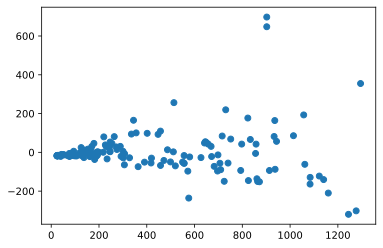

12.400839333428216

In [216]:
data = pd.read_csv('Fish.csv')
data['Volume'] = data['Length1'] * data['Height'] * data['Width']

np.random.seed(1337)
features = ['Volume']
TARGET = 'Weight'
data = data[data[TARGET] != 0]
model = sm.OLS(data[TARGET], sm.add_constant(data[features])).fit() 

plt.scatter(model.fittedvalues, model.resid)
plt.show()

data_e = pd.DataFrame({'e^2': model.resid.values ** 2, 'Volume': data['Volume']})
data_e['Volume^2'] = data_e['Volume'] ** 2

np.random.seed(1337)
features = ['Volume', 'Volume^2']
TARGET = 'e^2'
model_e = sm.OLS(data_e[TARGET], sm.add_constant(data_e[features])).fit() 

model_e.fvalue

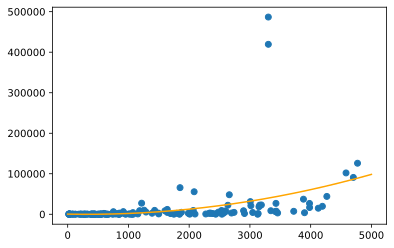

In [217]:
volume = np.linspace(0, 5000, 10000)
X = pd.DataFrame({'Volume': volume})
X['Volume^2'] = X['Volume'] ** 2

plt.scatter(data_e['Volume'], data_e['e^2'])
plt.plot(volume, model_e.predict(sm.add_constant(X)), color='orange')
plt.show()

**Задание 3**

In [215]:
data = pd.read_csv('Advertising.csv', index_col=0)

data['TV*radio'] = data['TV'] * data['radio']
data['log TV'] = np.log(data['TV'])

features_0 = ['TV', 'radio',	'newspaper', 'TV*radio', 	'log TV']
features_1 = ['radio', 'TV*radio', 	'log TV']
TARGET = 'sales'
np.random.seed(1337)
model = sm.OLS(data[TARGET], sm.add_constant(data[features_0])).fit() 
model_s = sm.OLS(data[TARGET], sm.add_constant(data[features_1])).fit()

n = len(data)
k0 = len(features_0)
k1 = len(features_1)

rss = (model.resid.values ** 2).sum() 
rss_s = (model_s.resid.values ** 2).sum()

stat = ((rss_s - rss) / (k0 - k1)) / ((rss / (n - k0 - 1)))
1 - ss.f(k0 - k1, n - k0 - 1).cdf(stat)

0.7546931770236975

**Задание 4**

In [214]:
data = pd.read_csv('Advertising.csv', index_col=0)

data['TV*radio'] = data['TV'] * data['radio']
data['log TV'] = np.log(data['TV'])

features_0 = ['TV', 'radio',	'newspaper', 'TV*radio', 	'log TV']
features_1 = ['radio', 'TV*radio', 	'log TV']
TARGET = 'sales'
np.random.seed(1337)
model = sm.OLS(data[TARGET], sm.add_constant(data[features_0])).fit() 
model_s = sm.OLS(data[TARGET], sm.add_constant(data[features_1])).fit()

n = len(data)
k0 = len(features_0)
k1 = len(features_1)

rss_star = (model.resid.values ** 2).sum() 
rss_s_star = (model_s.resid.values ** 2).sum()
delta_star = rss_s_star - rss_star

e = model_s.resid.values

N = 1000
n = len(e)
ide = np.random.choice(n, size = (N, n))
e_b = e[ide]

xbeta = model_s.fittedvalues.values

y_b = np.array([xbeta for i in range(N)]) + e_b

delta = []
for y in y_b:
  rss = (sm.OLS(y, sm.add_constant(data[features_0])).fit().resid.values ** 2).sum()
  rss_s = (sm.OLS(y, sm.add_constant(data[features_1])).fit().resid.values ** 2).sum()
  delta.append(rss_s - rss)

delta = np.array(delta)
(delta > delta_star).mean()

0.738

**Задание 5**

In [212]:
data = pd.read_csv('Fish.csv')

np.random.seed(1337)
features = ['Length1', 'Height','Width']
TARGET = 'Weight'
data = data[data[TARGET] != 0]
model = sm.OLS(np.log(data[TARGET]), sm.add_constant(np.log(data[features]))).fit() 

X = np.array(sm.add_constant(np.log(data[features])))

XTX_inv = np.linalg.inv(X.T @ X)
h = X @ XTX_inv @ X.T

print(*(np.arange(len(X))[np.diagonal(h) > 3 * np.diagonal(h).mean()] 
        + (np.arange(len(X))[np.diagonal(h) > 3 * np.diagonal(h).mean()] > 39)))

n = len(X)
k = 3
sigma_hat = np.sqrt((model.resid.values ** 2).sum() / (n - k - 1))
e_student = model.resid.values / (sigma_hat * np.sqrt(1 - np.diagonal(h)))

print(*np.arange(n)[abs(e_student) > 3])

72 142 143
13
